In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import helpers

In [3]:
import os
os.environ

environ{'PYENV_ROOT': '/Users/widgyrogers/.pyenv',
        'VSCODE_NODE_CACHED_DATA_DIR': '/Users/widgyrogers/Library/Application Support/Code/CachedData/ea3859d4ba2f3e577a159bc91e3074c5d85c0523',
        'SHELL': '/bin/zsh',
        'AMD_ENTRYPOINT': 'vs/workbench/services/extensions/node/extensionHostProcess',
        'TMPDIR': '/var/folders/st/hgwjfzjj1cv5mkstvft3y56m0000gp/T/',
        'PYTHONUNBUFFERED': '1',
        'ORIGINAL_XDG_CURRENT_DESKTOP': 'undefined',
        'ZSH': '/Users/widgyrogers/.oh-my-zsh',
        'PYTHONIOENCODING': 'utf-8',
        'USER': 'widgyrogers',
        'COMMAND_MODE': 'unix2003',
        'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.51mICS9IxA/Listeners',
        '__CF_USER_TEXT_ENCODING': '0x1F6:0x0:0x2',
        'VSCODE_LOG_STACK': 'false',
        'PYENV_VIRTUALENV_INIT': '1',
        'VIRTUAL_ENV': '/Users/widgyrogers/Library/Caches/pypoetry/virtualenvs/product-analytics-1D3fELKC-py3.8',
        'PAGER': 'cat',
        'ELECTRON_RUN_AS_NODE': 

In [3]:
connection = helpers.connect_db()
query_dict = helpers.get_queries()  

KeyError: 'CHURN_DB'

In [4]:
query_dict.keys()

dict_keys(['event_summary', 'subscription_summary', 'net_retention_rate'])

In [5]:
df_sub_summary = pd.read_sql_query(query_dict["subscription_summary"], connection)
df_event_summary = pd.read_sql_query(query_dict["event_summary"], connection)

In [6]:
x = df_sub_summary.subscriptions
y = df_sub_summary.pc

plt.bar(x, y)
plt.ylabel("Number of subscriptions purchased")
plt.ylabel("% of total customers 0-1")
plt.title("Distribution of the number of subscriptions per customer")
plt.show();

In [7]:
y1 = df_event_summary.event_count
y2 = df_event_summary.avg_time_performed_per_user
x = df_event_summary.event_type_name
events = df_event_summary.event_type_name.values

fig, ax = plt.subplots()

ax.invert_yaxis()
ax.set_title("Event summary")
ax.barh(x, y1, label="event count", color="steelblue")

# ax2 = ax.twiny()
# ax2.barh(x, y2, label="event per user", color="r")

plt.show();

In [8]:
df_nrr = pd.read_sql_query(query_dict["net_retention_rate"], connection)

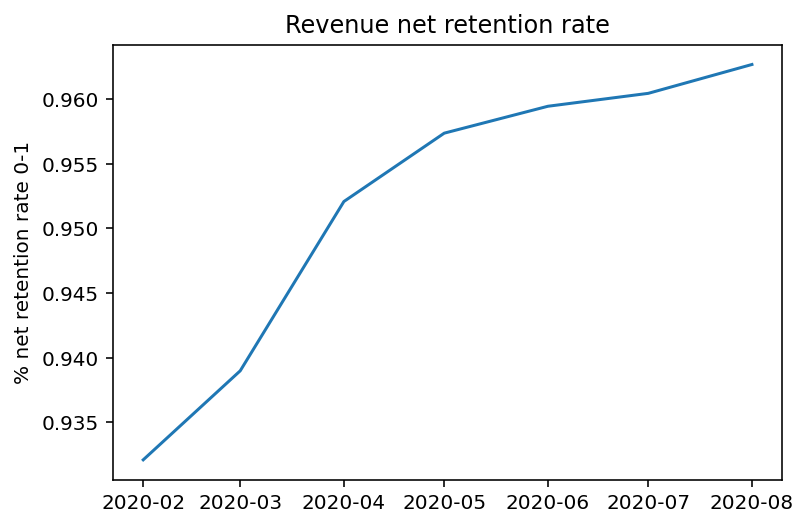

In [9]:
plt.plot(df_nrr.month_ds, df_nrr.net_mrr_retention_rate)
plt.ylabel("% net retention rate 0-1")
plt.title("Revenue net retention rate")
plt.show();

In [12]:
plt.plot(df_nrr.month_ds, df_nrr.net_mrr_retention_rate)
plt.ylabel("% net retention rate 0-1")
plt.ylim(0.8, 1)
plt.title("Revenue net retention rate")
plt.show();

Everyone is paying the same rate in the example (one value)

In [ ]:
df_simple_ga = pd.read_sql_query(query_dict["basic_ga"], connection)

In [ ]:
acquired = plt.bar(df_simple_ga.month_ds, df_simple_ga.acquired_users)
retained = plt.bar(df_simple_ga.month_ds, df_simple_ga.retained_users)
churned = plt.bar(df_simple_ga.month_ds, df_simple_ga.churned_users)

plt.title("Simple growth accounting")
plt.legend((acquired[0], retained[0], churned[0]), ('acquired', 'retained', 'churned'))
plt.show();

In [ ]:
df_cohort = pd.read_sql_query(query_dict["activity"], connection)

In [ ]:
df_cohort.cohort_month = _df_cohort.cohort_month.astype('str')
_df_cohort.set_index(['cohort_month', 'cohort_period'], inplace=True)
retention = _df_cohort.retention_pc.unstack(level=0)

In [ ]:
retention.plot(figsize=(10,5))
plt.title('User Retention')
plt.xticks(retention.index.values)
plt.ylabel('% of Cohort')